# Unsupervised Learning

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


## Review of tidyverse

**1**. How many rows and columns are there in the DataFrame?

**2**. Show just the Species column and any columns with information about `Petal`.

**3**. Show a DataFrame with just two columns showing the Length: Width ratio for Sepal and Petal.

**4**. Count the number of each species where `Sepal.Length` is less than 6.

**5**. Summarize the mean and standard deviation for each measurement grouped by Species.

**6**. Convert `iris` to "tall" form and assign the resulting DataFrame to `iris_t` with three columns `Species`, `Measurement` and `Value`.

## Pairwise scatter plot

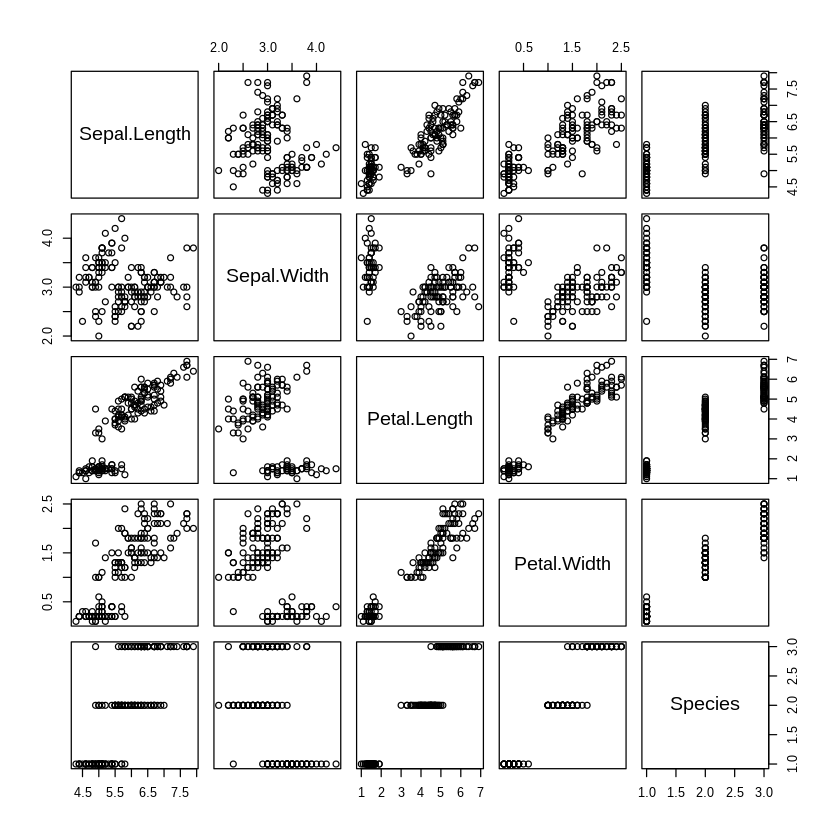

In [3]:
pairs(iris)

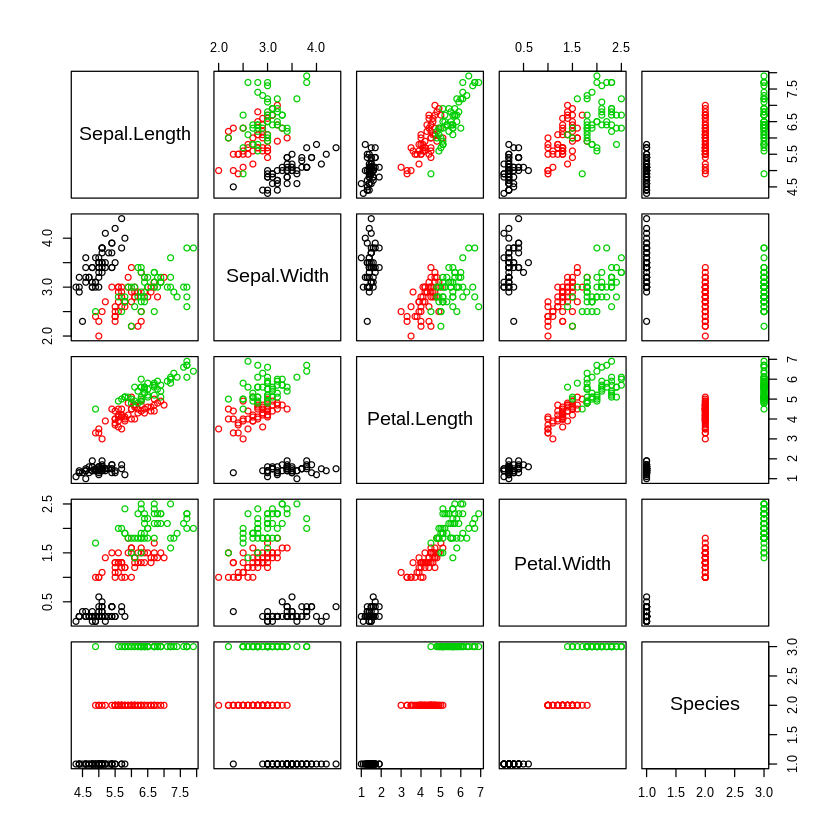

In [4]:
pairs(iris, col=iris$Species)

## Calculating distances

Mathematical conditions for a distance function - positivity, symmetry, triangle inequality.

In [5]:
small <- iris %>% select(-Species) %>% sample_n(6) 
small

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.9,3.2,4.8,1.8
5.0,3.4,1.6,0.4
4.8,3.0,1.4,0.3
5.5,2.5,4.0,1.3
7.1,3.0,5.9,2.1
6.7,3.1,4.7,1.5


### Euclidean distance

In [6]:
iris %>% select(-Species) -> df
x <- df[1,] 
y <- df[2,]
sqrt(sum((y-x)^2))

[1] 0.5385165

### Distance matrix

In [7]:
dist(small)

          1         2         3         4         5
2 3.6124784                                        
3 3.8807216 0.5000000                              
4 1.2409674 2.7622455 2.9154759                    
5 1.6673332 5.0941143 5.3646994 2.6570661          
6 0.8660254 3.7148351 3.9937451 1.5264338 1.4035669

In [8]:
dist(small, upper = T, diag=T)

          1         2         3         4         5         6
1 0.0000000 3.6124784 3.8807216 1.2409674 1.6673332 0.8660254
2 3.6124784 0.0000000 0.5000000 2.7622455 5.0941143 3.7148351
3 3.8807216 0.5000000 0.0000000 2.9154759 5.3646994 3.9937451
4 1.2409674 2.7622455 2.9154759 0.0000000 2.6570661 1.5264338
5 1.6673332 5.0941143 5.3646994 2.6570661 0.0000000 1.4035669
6 0.8660254 3.7148351 3.9937451 1.5264338 1.4035669 0.0000000

### Scaling before distance

In [9]:
dist(scale(small), upper=T, diag=T)

         1        2        3        4        5        6
1 0.000000 2.837472 3.074112 2.498835 1.633162 1.017358
2 2.837472 0.000000 1.357298 3.525992 4.217938 3.080620
3 3.074112 1.357298 0.000000 2.680814 4.270058 3.203481
4 2.498835 3.525992 2.680814 0.000000 2.834187 2.427062
5 1.633162 4.217938 4.270058 2.834187 0.000000 1.179145
6 1.017358 3.080620 3.203481 2.427062 1.179145 0.000000

### What is the distance matrix is showing?

In [10]:
dist(small, method = "maximum", diag=T, upper=T)

    1   2   3   4   5   6
1 0.0 3.2 3.4 0.8 1.2 0.8
2 3.2 0.0 0.4 2.4 4.3 3.1
3 3.4 0.4 0.0 2.6 4.5 3.3
4 0.8 2.4 2.6 0.0 1.9 1.2
5 1.2 4.3 4.5 1.9 0.0 1.2
6 0.8 3.1 3.3 1.2 1.2 0.0

## Agglomerative hierarchical clustering

In [11]:
iris %>% select(-Species) -> df

In [12]:
c1 <- hclust(dist(df))

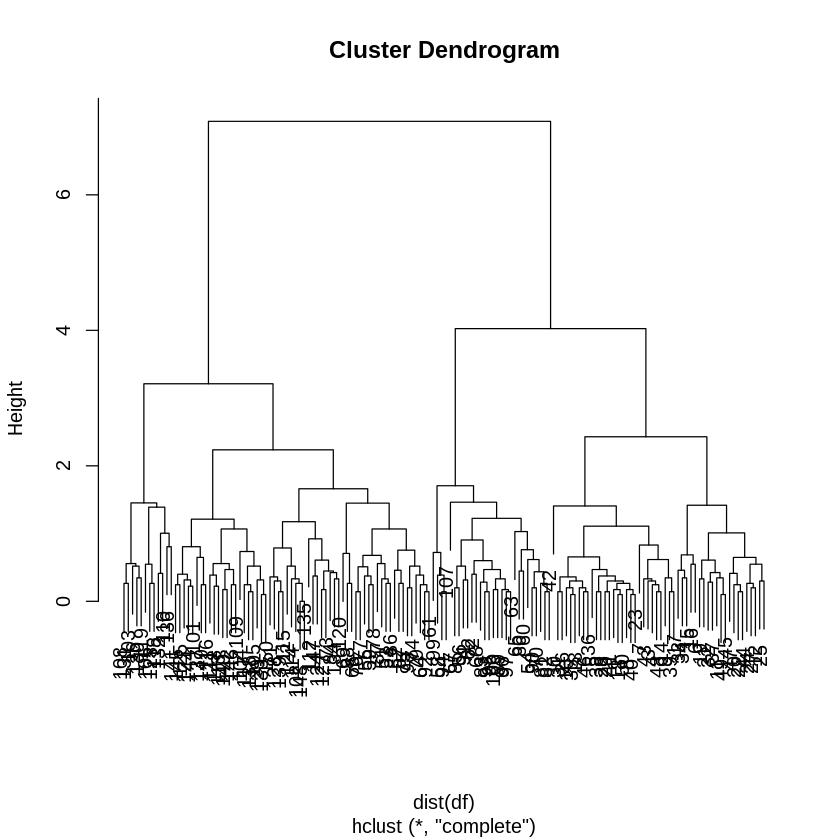

In [13]:
plot(c1)

In [14]:
z1 <- cutree(c1, 3)

In [15]:
z1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

Note that the label values are arbitrary - all we know is that the `1`s belong to the same cluster, the `2`s belong a another cluster, and the `3`s belong to the final cluster. We have no idea what Species thee cluster labels represent, or even if the assignment is "correct" compared to the ground truth.

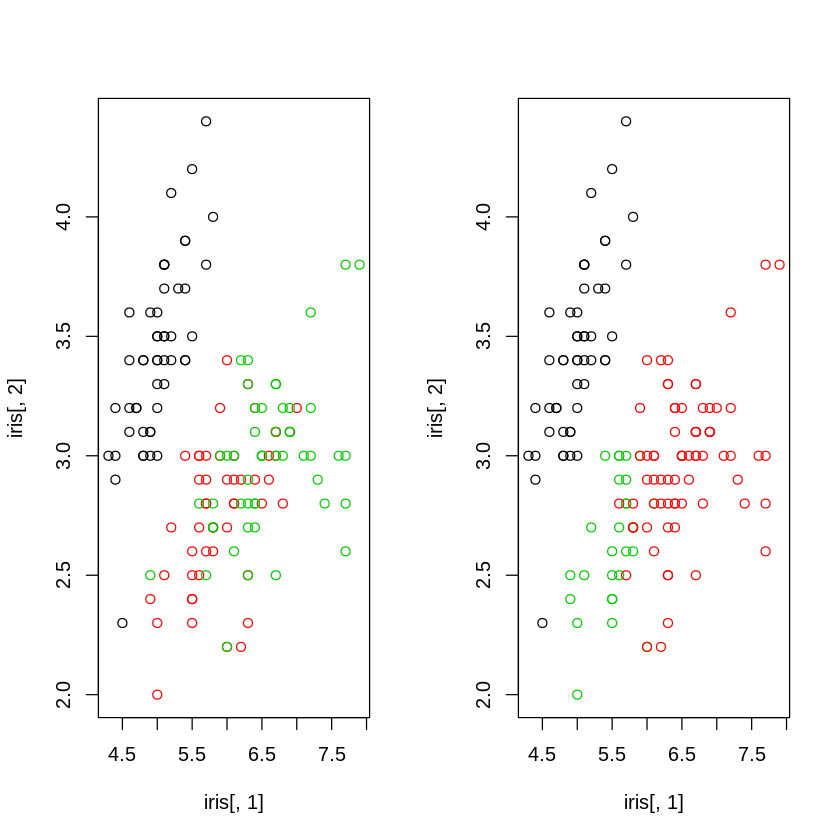

In [16]:
par(mfrow=c(1,2))
plot(iris[, 1], iris[,2], col=iris$Species)
plot(iris[, 1], iris[,2], col=z1)

### Different linkage methods can give different cluster assignments

In [17]:
c2 <- hclust(dist(df), method="average")

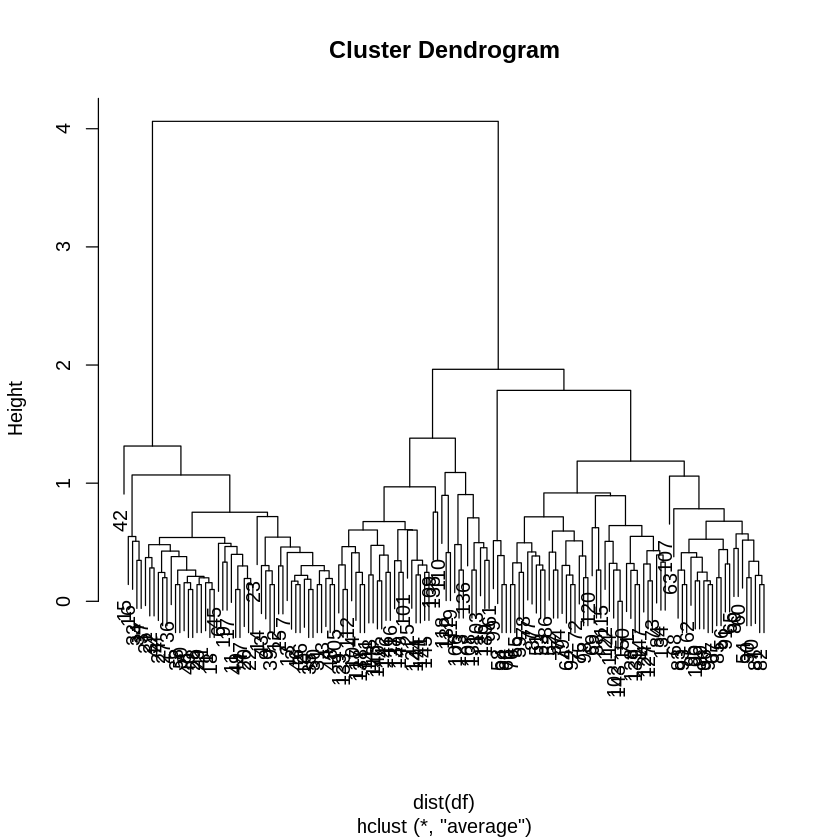

In [18]:
plot(c2)

In [19]:
z2 <- cutree(c2, k=3)

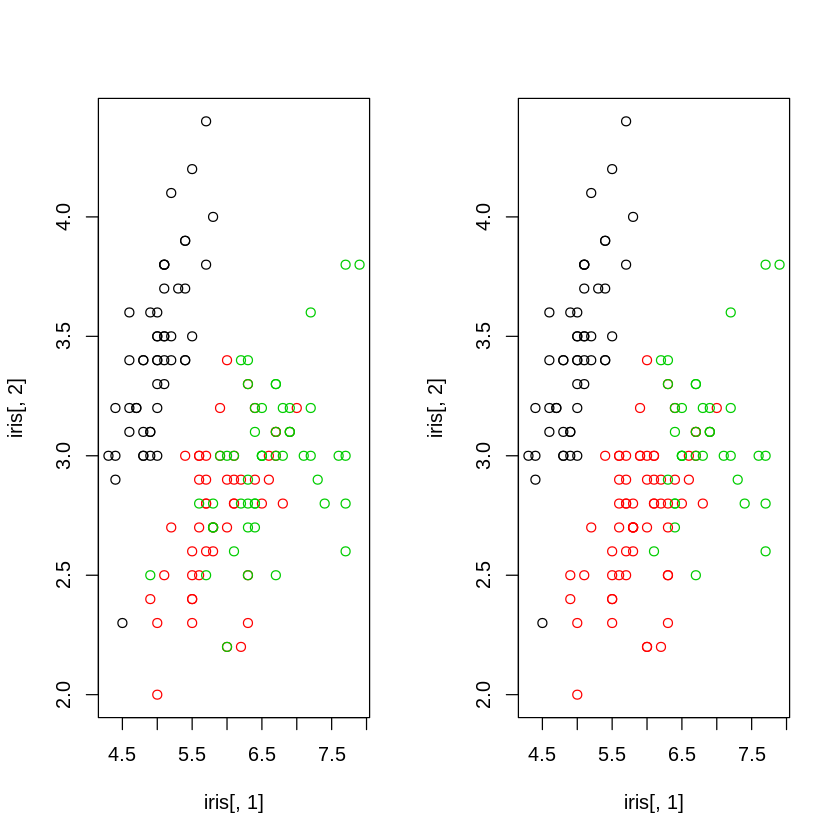

In [20]:
par(mfrow=c(1,2))
plot(iris[, 1], iris[,2], col=iris$Species)
plot(iris[, 1], iris[,2], col=z2)

### But in reality, we would not know the true number of clusters!

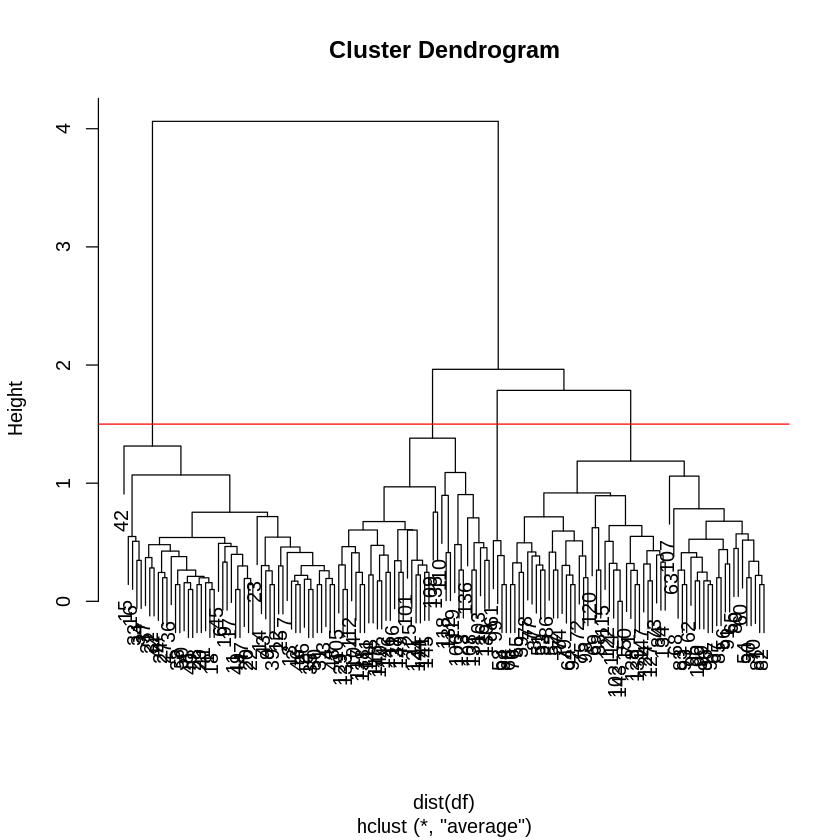

In [21]:
plot(c2)
abline(h=1.5, col='red')

### Slightly more informative plot

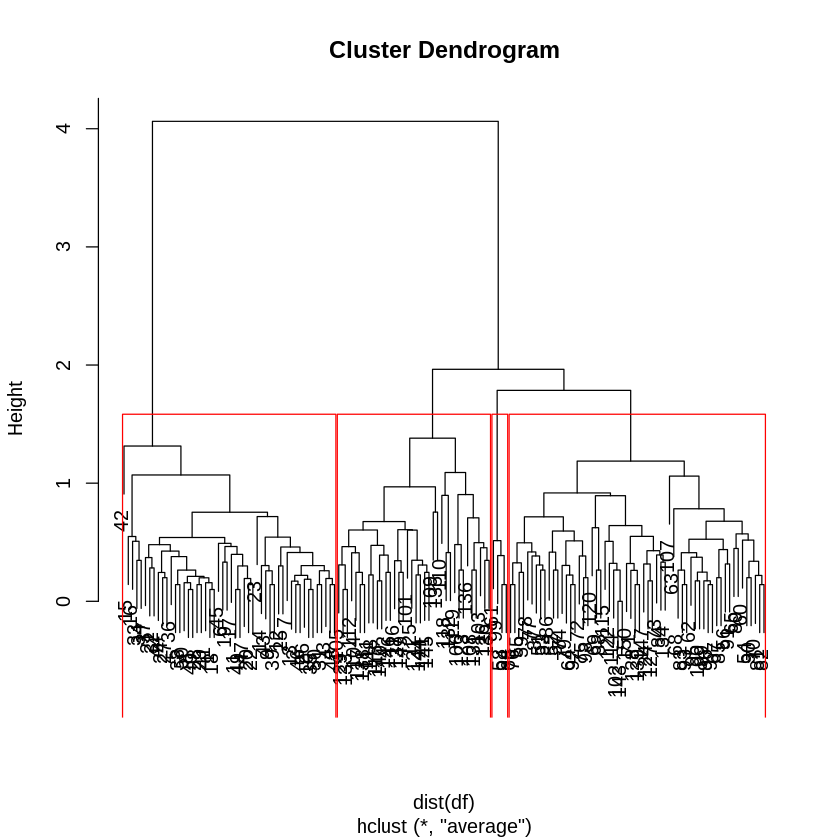

In [22]:
plot(c2)
rect.hclust(c2, h=1.5, border="red")

In [23]:
z3 <- cutree(c2, h=1.5)

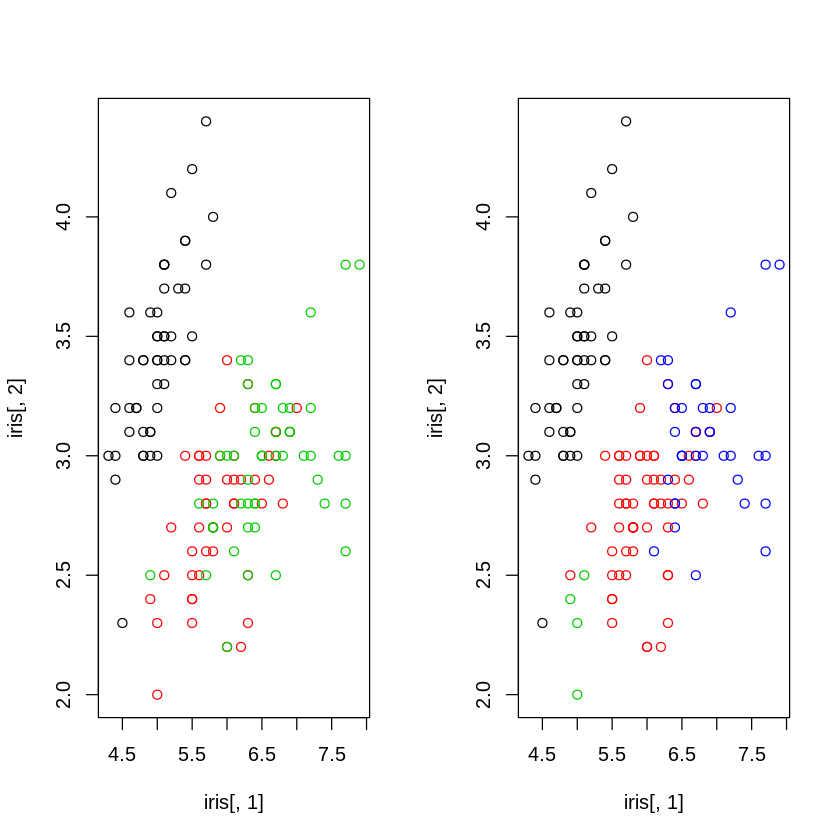

In [24]:
par(mfrow=c(1,2))
plot(iris[, 1], iris[,2], col=iris$Species)
plot(iris[, 1], iris[,2], col=z3)

## K-means clustering

In [25]:
k1 <- kmeans(dist(df), centers=3)

In [26]:
str(k1)

List of 9
 $ cluster     : Named int [1:150] 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ centers     : num [1:3, 1:150] 5.095 0.5 3.464 5.146 0.622 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:150] "1" "2" "3" "4" ...
 $ totss       : num 55479
 $ withinss    : num [1:3] 1745 495 2593
 $ tot.withinss: num 4833
 $ betweenss   : num 50646
 $ size        : int [1:3] 38 50 62
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [27]:
as.vector(k1$cluster)

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 1 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

### Finding cluster means

#### Base R

These incantations are hard to remember. I suggest you stick to `tidyverse` methods.

In [28]:
aggregate(df,by=list(k1$cluster),FUN=mean)

Group.1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.821053,3.065789,5.747368,2.094737
2,5.006000,3.428000,1.462000,0.246000
3,5.919355,2.753226,4.390323,1.419355


#### `dplyr`

In [29]:
df %>% 
mutate(z = k1$cluster)  %>% 
group_by(z) %>% 
summarise_all(mean) -> centroids

In [30]:
centroids

z,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.821053,3.065789,5.747368,2.094737
2,5.006000,3.428000,1.462000,0.246000
3,5.919355,2.753226,4.390323,1.419355


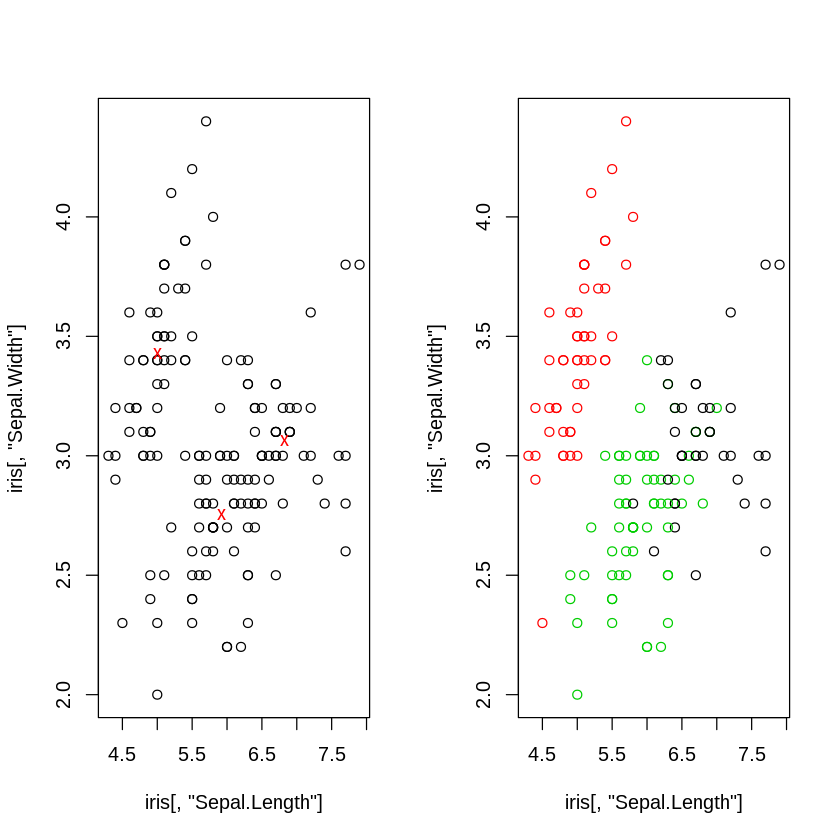

In [31]:
par(mfrow=c(1,2))
plot(iris[,"Sepal.Length"], iris[,"Sepal.Width"])
points(centroids[["Sepal.Length"]], centroids[["Sepal.Width"]], col="red",  pch="x")
plot(iris[,"Sepal.Length"], iris[,"Sepal.Width"], col=k1$cluster)

## Dimension reduction and ordination

### PCA

In [32]:
pc <- prcomp(df, center=T, scale=T)

In [33]:
str(pc)

List of 5
 $ sdev    : num [1:4] 1.708 0.956 0.383 0.144
 $ rotation: num [1:4, 1:4] 0.521 -0.269 0.58 0.565 -0.377 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 $ center  : Named num [1:4] 5.84 3.06 3.76 1.2
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ scale   : Named num [1:4] 0.828 0.436 1.765 0.762
  ..- attr(*, "names")= chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ x       : num [1:150, 1:4] -2.26 -2.07 -2.36 -2.29 -2.38 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "PC1" "PC2" "PC3" "PC4"
 - attr(*, "class")= chr "prcomp"


In [34]:
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

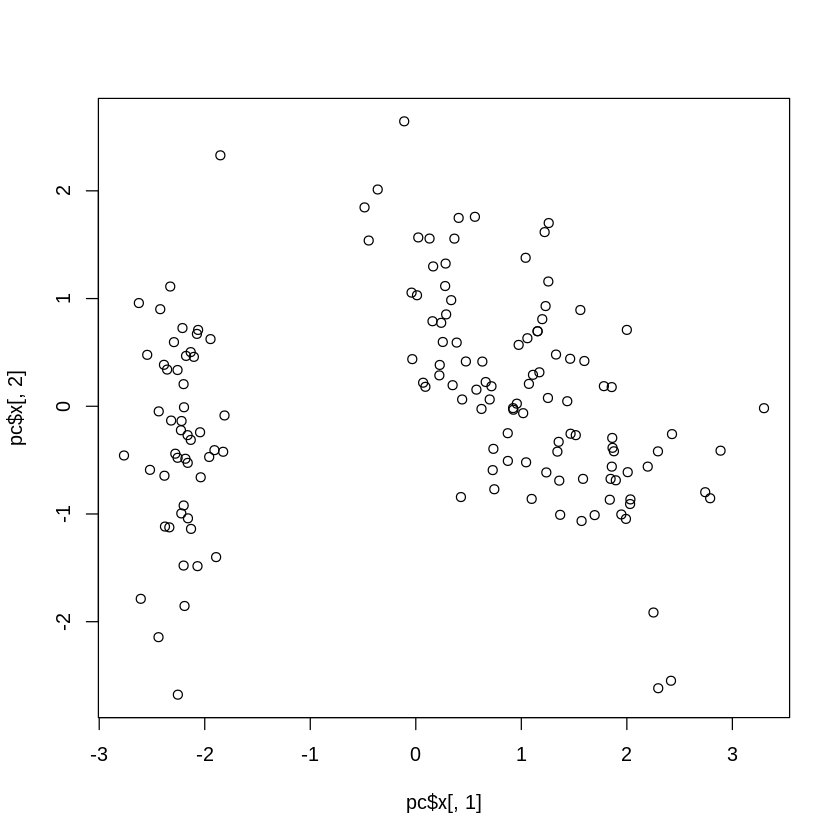

In [35]:
plot(pc$x[,1], pc$x[,2])

#### Classical MDS

In [36]:
mds <- cmdscale(dist(df), k = 2)

In [37]:
str(mds)

 num [1:150, 1:2] -2.68 -2.71 -2.89 -2.75 -2.73 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


In [38]:
summary(mds)

       V1                V2          
 Min.   :-3.2238   Min.   :-1.26597  
 1st Qu.:-2.5303   1st Qu.:-0.32542  
 Median : 0.5546   Median :-0.02216  
 Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 1.5501   3rd Qu.: 0.32492  
 Max.   : 3.7956   Max.   : 1.37417  

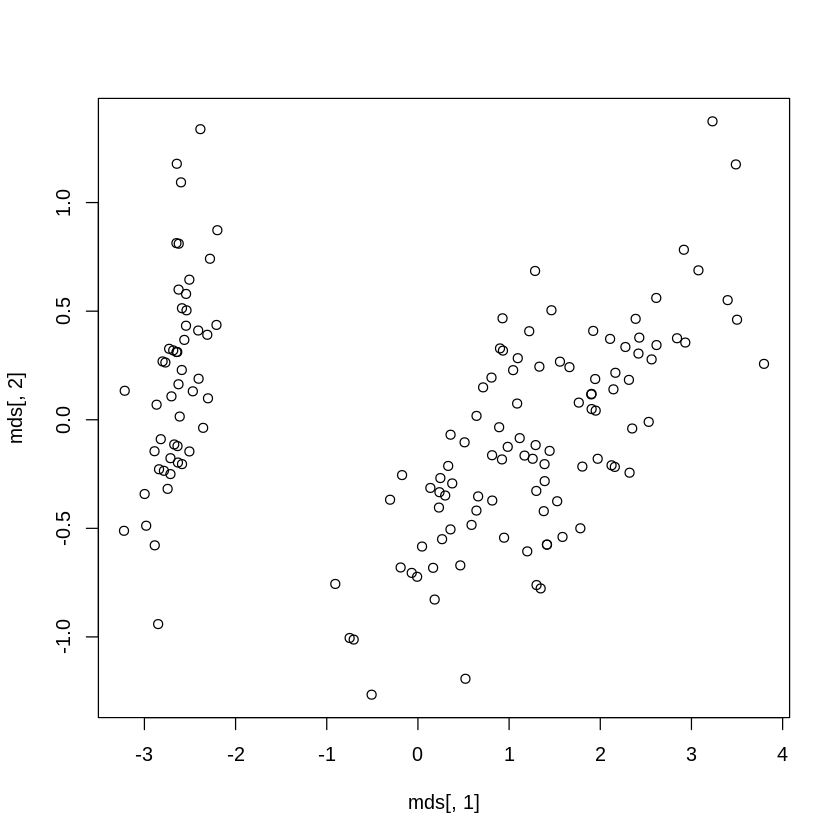

In [39]:
plot(mds[,1], mds[,2])

## Heatmaps

In [40]:
library(pheatmap)

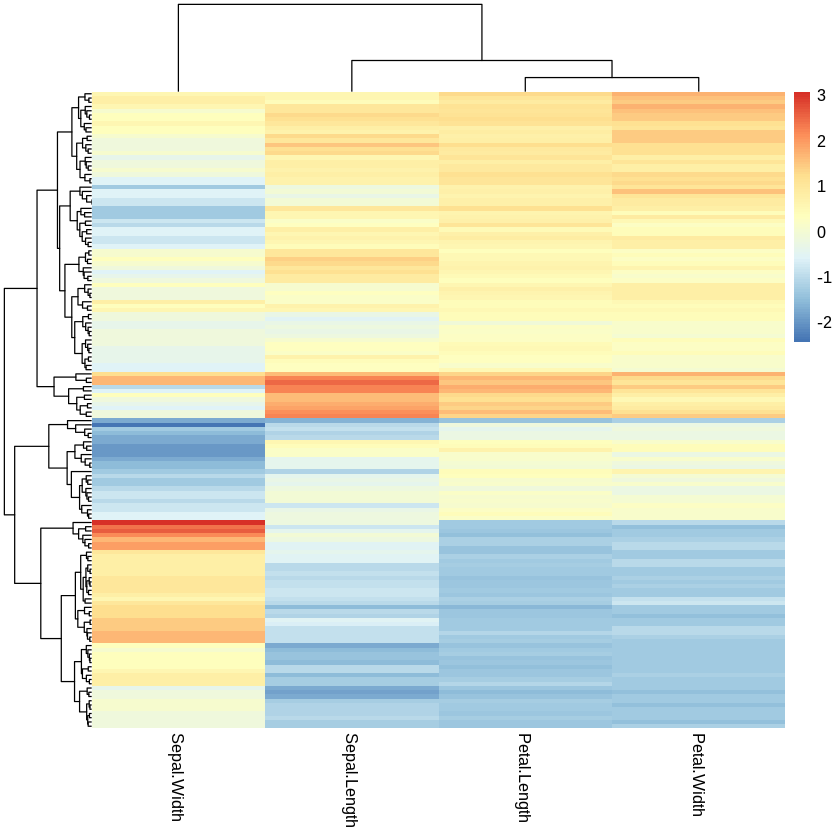

In [41]:
pheatmap(scale(df))

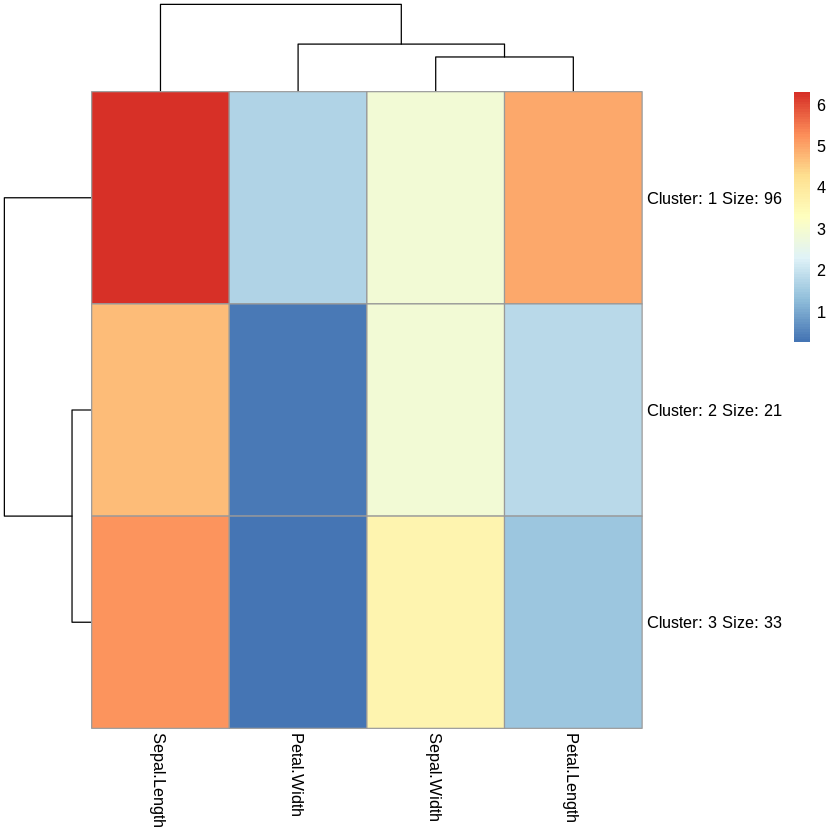

In [42]:
pheatmap(df, kmeans_k = 3)

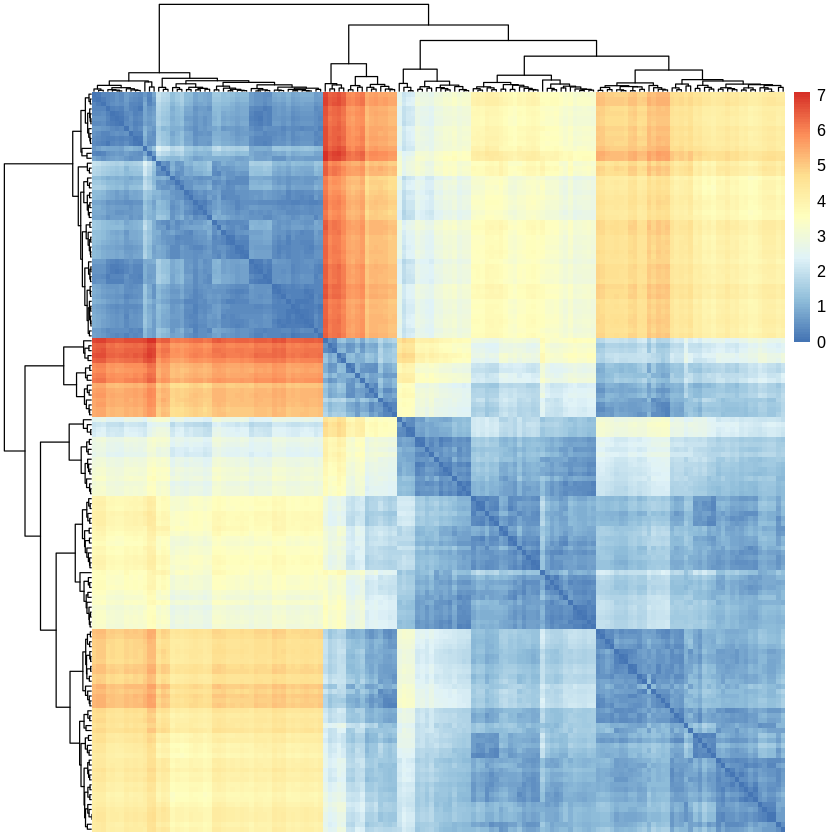

In [43]:
pheatmap(dist(df))